# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data/human_body_temperature.csv')

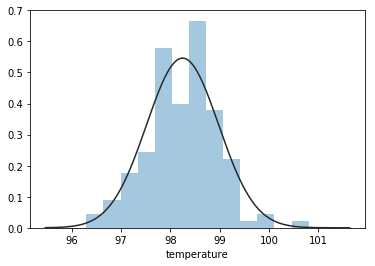

In [16]:
import seaborn as sns
from scipy import stats
sns.distplot(df['temperature'],kde=False, fit=stats.gamma);

In [21]:
import numpy as np
print(np.mean(df['temperature']))
print(np.std(df['temperature']))

98.2492307692
0.730357778905


(array([  9.,  42., 152., 257., 223., 190.,  96.,  25.,   3.,   3.]),
 array([98.41384615, 98.45769231, 98.50153846, 98.54538462, 98.58923077,
        98.63307692, 98.67692308, 98.72076923, 98.76461538, 98.80846154,
        98.85230769]),
 <a list of 10 Patch objects>)

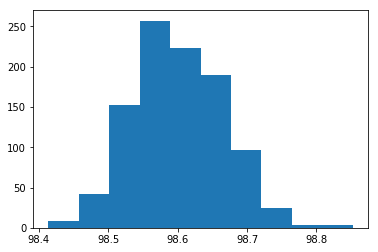

In [115]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

translated = df['temperature']-np.mean(df['temperature'])+98.6
bs_diff_replicates = draw_bs_reps(translated,np.mean,1000)
plt.hist(bs_diff_replicates)
#val = np.sum(bs_diff_replicates == 98.6)
#print(np.float(val)/1000)

In [44]:
# Above With p value of 0.001, we can reject the null hypothesis
# ztest x-Mu/Ro
diff_mean = 98.6 - np.mean(df['temperature'])
std = np.std(df['temperature'])
diff_mean/std
1-0.6844

0.3156

((array([-2.55445479, -2.22902648, -2.0419783 , -1.90719589, -1.80015121,
         -1.71047373, -1.63275826, -1.56381343, -1.50159038, -1.44469181,
         -1.39212017, -1.3431372 , -1.29718048, -1.2538112 , -1.21268003,
         -1.17350409, -1.13605091, -1.10012698, -1.06556939, -1.03223961,
         -1.00001877, -0.96880405, -0.93850586, -0.90904562, -0.88035396,
         -0.85236935, -0.82503685, -0.79830725, -0.77213622, -0.74648367,
         -0.72131321, -0.69659166, -0.67228871, -0.64837651, -0.62482945,
         -0.60162387, -0.57873784, -0.55615102, -0.53384444, -0.51180041,
         -0.49000234, -0.46843466, -0.44708273, -0.42593273, -0.40497157,
         -0.38418687, -0.36356684, -0.34310027, -0.32277642, -0.30258504,
         -0.28251629, -0.2625607 , -0.24270913, -0.22295275, -0.20328303,
         -0.18369165, -0.16417053, -0.14471177, -0.12530767, -0.10595063,
         -0.08663321, -0.06734807, -0.04808795, -0.02884566, -0.00961403,
          0.00961403,  0.02884566,  0.

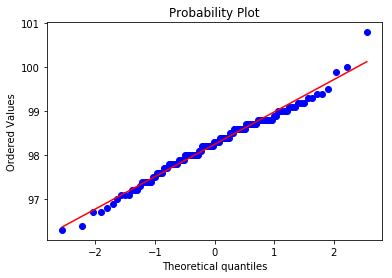

In [121]:
from scipy import stats
stats.probplot(df['temperature'], plot=plt)